# Experiment 3

Experiment 3 aims to explore the effect of swarm size on the performance of the swarm in exploring the pipe network.

In [1]:
import random
random.seed(42)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import networkx as nx

In [2]:
import logging

from src.simulation import Simulation
from src.network import Network
from src.render import Render

logging.disable(logging.CRITICAL)

In [3]:
# Relative Path to Network INP File
network_file = "networks/Net3.inp"
# Create the environment
env = Network(network_file)
# Get all the nodes in the network with degree = 1 - these are the possible start nodes
g = env.water_network_model.to_graph().to_undirected()
deg = g.degree
start_pool = [node for node, degree in deg if degree == 1]
print(f"Start Pool: {start_pool}")
print(f"Number of Start Nodes: {len(start_pool)}")
print(f"Number of Nodes: {len(g.nodes)}")
print(f"Number of Links: {len(g.edges)}")

Start Pool: ['15', '35', '131', '166', '167', '203', '219', '225', '231', '243', '253', 'River', 'Lake', '1', '2', '3']
Number of Start Nodes: 16
Number of Nodes: 97
Number of Links: 119


## Create simulations

### Simulation parameters

- env: the network environment
- num_agents: the number of agents to create (this will vary)
- swarm: whether to use swarm intelligence - all options will be tested
- swarm_config: the configuration of the swarm - all options will be tested
- start_node: the start node of the agents - a random node will be chosen from the start node pool
- max_turns: the maximum number of turns to run the simulation for

In [88]:
start_nodes = start_pool[:15]
number_of_agents = [10, 20, 30, 40, 50]
max_turns = 500

print(f"Start Nodes: {start_nodes}")

Start Nodes: ['15', '35', '131', '166', '167', '203', '219', '225', '231', '243', '253', 'River', 'Lake', '1', '2']


### Experiment 3.1

- env: the network environment
- num_agents: 10, 20, 30, 40, 50
- swarm: False
- swarm_config: None
- start_node: a random node from the start node pool
- max_turns: 1000
- run_until_complete: True
- metric: 'pct_links_explored'
- filepath: notable-results/Experiment3/NoSwarm

The simulation will run until 100% of the links in the network have been explored or the maximum number of turns has been reached.

In [89]:
simulations_3_1 = []

for agent_num in number_of_agents:
    for start_node in start_nodes:
        print(f"Number of Agents: {agent_num} - Start Node: {start_node}")
        sim = Simulation(env, num_agents=agent_num, swarm=False, start_positions=[start_node], filepath="notable-results/Experiment-3/NoSwarm")
        sim.run(max_turns=1000, run_until_complete=True, metric="pct_links_explored")
        simulations_3_1.append((agent_num, sim.path_to_results_directory))
    
print(f"Done: {simulations_3_1}")

Number of Agents: 10 - Start Node: 15
Number of Agents: 10 - Start Node: 35
Number of Agents: 10 - Start Node: 131
Number of Agents: 10 - Start Node: 166
Number of Agents: 10 - Start Node: 167
Number of Agents: 10 - Start Node: 203
Number of Agents: 10 - Start Node: 219
Number of Agents: 10 - Start Node: 225
Number of Agents: 10 - Start Node: 231
Number of Agents: 10 - Start Node: 243
Number of Agents: 10 - Start Node: 253
Number of Agents: 10 - Start Node: River
Number of Agents: 10 - Start Node: Lake
Number of Agents: 10 - Start Node: 1
Number of Agents: 10 - Start Node: 2
Number of Agents: 20 - Start Node: 15
Number of Agents: 20 - Start Node: 35
Number of Agents: 20 - Start Node: 131
Number of Agents: 20 - Start Node: 166
Number of Agents: 20 - Start Node: 167
Number of Agents: 20 - Start Node: 203
Number of Agents: 20 - Start Node: 219
Number of Agents: 20 - Start Node: 225
Number of Agents: 20 - Start Node: 231
Number of Agents: 20 - Start Node: 243
Number of Agents: 20 - Start N

### Experiment 3.2

- env: the network environment
- num_agents: 10, 20, 30, 40, 50
- swarm: True
- swarm_config: naive
- start_node: a random node from the start node pool
- max_turns: 1000
- run_until_complete: True
- metric: 'pct_links_explored'
- filepath: notable-results/Experiment3/NaiveSwarm

The simulation will run until 100% of the links in the network have been explored or the maximum number of turns has been reached.

In [6]:
swarm_config = {'swarm': True, 'swarm_type': 'naive'}

simulations_3_2 = []

for agent_num in number_of_agents:
    print(f"Number of Agents: {agent_num} - Start Node: {start_node}")
    sim = Simulation(env, num_agents=agent_num, swarm=True, swarm_config=swarm_config, start_positions=[start_node], filepath="notable-results/Experiment-3/NaiveSwarm")
    sim.run(max_turns=1000, run_until_complete=True, metric="pct_links_explored")
    simulations_3_2.append((agent_num, sim.path_to_results_directory))

print(f"Done: {simulations_3_2}")

Number of Agents: 10 - Start Node: 166
Number of Agents: 20 - Start Node: 166
Number of Agents: 30 - Start Node: 166
Number of Agents: 40 - Start Node: 166
Number of Agents: 50 - Start Node: 166
Done: [(10, 'notable-results/Experiment-3/NaiveSwarm/simulation_20230324_145248'), (20, 'notable-results/Experiment-3/NaiveSwarm/simulation_20230324_145249'), (30, 'notable-results/Experiment-3/NaiveSwarm/simulation_20230324_145249'), (40, 'notable-results/Experiment-3/NaiveSwarm/simulation_20230324_145250'), (50, 'notable-results/Experiment-3/NaiveSwarm/simulation_20230324_145250')]


### Experiment 3.3

- env: the network environment
- num_agents: 10, 20, 30, 40, 50
- swarm: True
- swarm_config: informed, mean
- start_node: a random node from the start node pool
- max_turns: 1000
- run_until_complete: True
- metric: 'pct_links_explored'
- filepath: notable-results/Experiment3/InformedMeanSwarm

The simulation will run until 100% of the links in the network have been explored or the maximum number of turns has been reached.

In [7]:
swarm_config = {'swarm': True, 'swarm_type': 'informed', 'allocation_threshold': 'mean'}

simulations_3_3 = []

for agent_num in number_of_agents:
    print(f"Number of Agents: {agent_num} - Start Node: {start_node}")
    sim = Simulation(env, num_agents=agent_num, swarm=True, swarm_config=swarm_config, start_positions=[start_node], filepath="notable-results/Experiment-3/InformedMeanSwarm")
    sim.run(max_turns=1000, run_until_complete=True, metric="pct_links_explored")
    simulations_3_3.append((agent_num, sim.path_to_results_directory))

print(f"Done: {simulations_3_3}")

Number of Agents: 10 - Start Node: 166
Number of Agents: 20 - Start Node: 166
Number of Agents: 30 - Start Node: 166
Number of Agents: 40 - Start Node: 166
Number of Agents: 50 - Start Node: 166
Done: [(10, 'notable-results/Experiment-3/InformedMeanSwarm/simulation_20230324_145251'), (20, 'notable-results/Experiment-3/InformedMeanSwarm/simulation_20230324_145252'), (30, 'notable-results/Experiment-3/InformedMeanSwarm/simulation_20230324_145252'), (40, 'notable-results/Experiment-3/InformedMeanSwarm/simulation_20230324_145253'), (50, 'notable-results/Experiment-3/InformedMeanSwarm/simulation_20230324_145253')]


### Experiment 3.4

- env: the network environment
- num_agents: 10, 20, 30, 40, 50
- swarm: True
- swarm_config: informed, median
- start_node: a random node from the start node pool
- max_turns: 1000
- run_until_complete: True
- metric: 'pct_links_explored'
- filepath: notable-results/Experiment3/InformedMedianSwarm

The simulation will run until 100% of the links in the network have been explored or the maximum number of turns has been reached.

In [8]:
swarm_config = {'swarm': True, 'swarm_type': 'informed', 'allocation_threshold': 'median'}

simulations_3_4 = []

for agent_num in number_of_agents:
    print(f"Number of Agents: {agent_num} - Start Node: {start_node}")
    sim = Simulation(env, num_agents=agent_num, swarm=True, swarm_config=swarm_config, start_positions=[start_node], filepath="notable-results/Experiment-3/InformedMedianSwarm")
    sim.run(max_turns=1000, run_until_complete=True, metric="pct_links_explored")
    simulations_3_4.append((agent_num, sim.path_to_results_directory))

print(f"Done: {simulations_3_4}")

Number of Agents: 10 - Start Node: 166
Number of Agents: 20 - Start Node: 166
Number of Agents: 30 - Start Node: 166
Number of Agents: 40 - Start Node: 166
Number of Agents: 50 - Start Node: 166
Done: [(10, 'notable-results/Experiment-3/InformedMedianSwarm/simulation_20230324_145254'), (20, 'notable-results/Experiment-3/InformedMedianSwarm/simulation_20230324_145255'), (30, 'notable-results/Experiment-3/InformedMedianSwarm/simulation_20230324_145255'), (40, 'notable-results/Experiment-3/InformedMedianSwarm/simulation_20230324_145256'), (50, 'notable-results/Experiment-3/InformedMedianSwarm/simulation_20230324_145256')]


## Results

In [9]:
# from typing import List

# def filter_results(dataframe, simulations, data_of_interest):
#     """
#     Filters the results of the simulations and returns a single dataframe with
#     the consolidated results.
#     """
#     for number_of_agents, path in simulations:
#         temp = pd.read_csv(path + "/results.csv")
        
#         # Get the point at which the network is fully explored or the max turns is reached
#         temp = temp[temp[data_of_interest] == temp[data_of_interest].max()]
        
#         # Add the number of agents to the dataframe
#         temp['num_agents'] = number_of_agents
        
#         # Append the dataframe to the list
#         dataframe = pd.concat([dataframe, temp])
        
#     return dataframe

# def create_dataframe(swarm_types:list, experiment_dataframes:List[pd.DataFrame]):
#     """
#     Creates a dataframe with the swarm type and the number of agents as the columns.
#     The values are the number of links explored.
#     """
#     df = pd.DataFrame()
#     for swarm_type, experiment_dataframe in zip(swarm_types, experiment_dataframes):
#         df[swarm_type] = experiment_dataframe['pct_links_explored']
#     return df

In [10]:
# # Create the dataframes
# df_3_1 = pd.DataFrame()
# df_3_1 = filter_results(df_3_1, simulations_3_1, 'pct_links_explored')

# df_3_2 = pd.DataFrame()
# df_3_2 = filter_results(df_3_2, simulations_3_2, 'pct_links_explored')

# df_3_3 = pd.DataFrame()
# df_3_3 = filter_results(df_3_3, simulations_3_3, 'pct_links_explored')

# df_3_4 = pd.DataFrame()
# df_3_4 = filter_results(df_3_4, simulations_3_4, 'pct_links_explored')

**What do I have?**

csv files with the following columns:
- turn number
- the percentage of nodes explored at that turn
- the percentage of links explored at that turn
- the node novelty at that turn
- the link novelty at that turn

**What do I want?**

Number of agents on the x-axis and the percentage of links explored on the y-axis?

Number of agents on the x-axis and the percentage of nodes explored on the y-axis?

Number of agents on the x-axis and the number of turns to explore 100% of the links on the y-axis?

In [11]:
# from typing import List

# def filter_results(dataframe, simulations, data_of_interest):

# def create_dataframe(swarm_types:list, experiment_dataframes:List[pd.DataFrame]):
#     """
#     Creates a dataframe with the swarm type and the number of agents as the columns.
#     The values are the number of links explored.
#     """
#     df = pd.DataFrame()
#     for swarm_type, experiment_dataframe in zip(swarm_types, experiment_dataframes):
#         df[swarm_type] = experiment_dataframe['pct_links_explored']
#     return df

In [39]:

results = pd.DataFrame()

# Create a dataframe containing the results of all the simulations
# The dataframe will have the number of agents as the columns and the swarm type
# as the index and the data will be the turns required to fully explore the network
# for each swarm type and number of agents combination

# Create the dataframes
df_3_1 = pd.DataFrame()
for number_of_agents, path in simulations_3_1:
    temp = pd.read_csv(path + "/results.csv")
    temp = temp[['turn', 'pct_links_explored']]
    temp = temp.max()
    df_3_1[number_of_agents] = temp
    
df_3_2 = pd.DataFrame()
for number_of_agents, path in simulations_3_2:
    temp = pd.read_csv(path + "/results.csv")
    temp = temp[['turn', 'pct_links_explored']]
    temp = temp.max()
    df_3_2[number_of_agents] = temp
    
df_3_3 = pd.DataFrame()
for number_of_agents, path in simulations_3_3:
    temp = pd.read_csv(path + "/results.csv")
    temp = temp[['turn', 'pct_links_explored']]
    temp = temp.max()
    df_3_3[number_of_agents] = temp

df_3_4 = pd.DataFrame()
for number_of_agents, path in simulations_3_4:
    temp = pd.read_csv(path + "/results.csv")
    temp = temp[['turn', 'pct_links_explored']]
    temp = temp.max()
    df_3_4[number_of_agents] = temp

In [40]:
df_3_1

,10,20,30,40,50
turn,999.00000,999.00000,999.00000,999.00000,999.00000
pct_links_explored,52.10084,52.10084,52.10084,52.10084,52.10084


In [41]:
df_3_2

,10,20,30,40,50
turn,132.0,69.0,69.0,54.0,54.0
pct_links_explored,100.0,100.0,100.0,100.0,100.0


In [42]:
df_3_3

,10,20,30,40,50
turn,121.0,48.0,48.0,48.0,48.0
pct_links_explored,100.0,100.0,100.0,100.0,100.0


In [43]:
df_3_4

,10,20,30,40,50
turn,121.0,48.0,48.0,48.0,48.0
pct_links_explored,100.0,100.0,100.0,100.0,100.0


In [46]:
# Create the dataframe with the swarm type as the index and the number of agents as the columns
swarm_types = ['no-swarm', 'naive', 'informed-mean', 'informed-median']
experiment_dataframes = [df_3_1, df_3_2, df_3_3, df_3_4]
number_of_agents = [10, 20, 30, 40, 50]

results = pd.DataFrame()
results.index.name = 'Swarm Type'
results.columns.name = 'Number of Agents'

for num in number_of_agents:
    for swarm_type in swarm_types:
        results.loc[swarm_type, num] = experiment_dataframes[swarm_types.index(swarm_type)][num][0]
    
results

Number of Agents,10,20,30,40,50
Swarm Type,,,,,
no-swarm,999.0,999.0,999.0,999.0,999.0
naive,132.0,69.0,69.0,54.0,54.0
informed-mean,121.0,48.0,48.0,48.0,48.0
informed-median,121.0,48.0,48.0,48.0,48.0


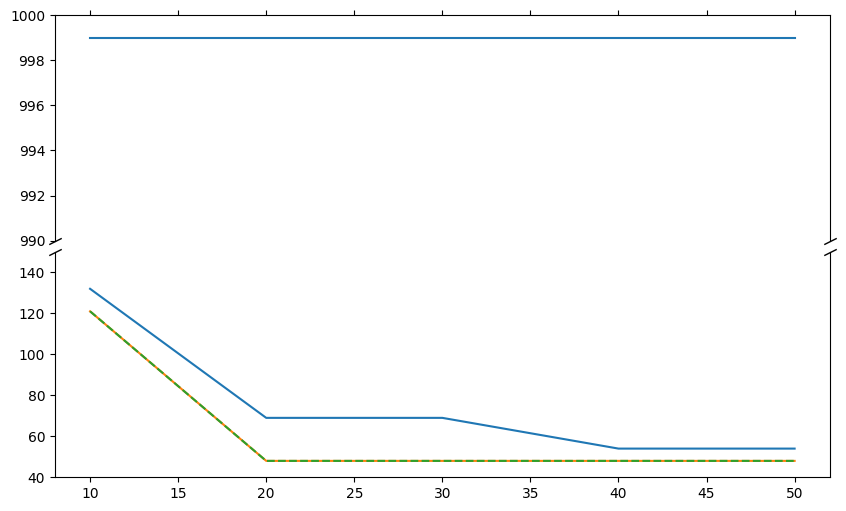

In [87]:
# Plot the results
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
fig.subplots_adjust(hspace=0.05)

ax1.plot(results.columns, results.loc['no-swarm'], label='No Swarm')
ax2.plot(results.columns, results.loc['naive'], label='Naive')
ax2.plot(results.columns, results.loc['informed-mean'], label='Informed Mean', linestyle='-')
ax2.plot(results.columns, results.loc['informed-median'], label='Informed Median', linestyle='--')

ax1.set_ylim(990, 1000)
ax2.set_ylim(40, 150)

ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .5
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=9,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

plt.show()